# Support points with Weighted Likelihood Bootstrap

_____

# 0. Setup

In [1]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pdb
from scipy.spatial.distance import pdist
import sys
import tensorflow as tf
import time

from sp_utils import (
    get_support_points,
    scatter_and_hist,
    eval_uncertainty)

plt.style.use('ggplot')
print(sys.version)
print(tf.__version__)

3.7.1 (default, Nov 28 2018, 11:55:14) 
[Clang 9.0.0 (clang-900.0.39.2)]
1.13.1


____

# 1. Global Config

In [2]:
# Set global constants.          # main1()
IS_TF = True                     # Boolean. Use TensorFlow rather than analytical gradients.
DATA_SOURCE = 'balog'            # ['balog', 'gaussian', 'gamma', 'beta']
MAX_ITER = 301                  # Num iterations in each support point optimization. [301]
LR = 0.01                         # Energy optimization learning rate. [5e-3]

ENERGY_POWER = 2.                # Power for energy distance kernel.
M = 500                          # Number of data points.
N = 25                           # Number of support points.
DIM = 2                          # Dimension of data.

___

# 2. Load and Plot Data

In [3]:
if DATA_SOURCE == 'balog':
    os.system('python data.py {} {}'.format(M, DIM))
    
    # Note that Balog's N is our M.
    DATA_PATH = '../data/mixture_of_Gaussians_N{}_D{}.npz'. format(M, DIM)

Loaded M=500 data points with dimension DIM=2


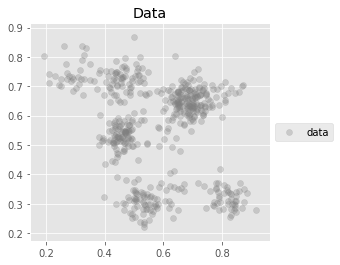

In [4]:
# Load data.
if DATA_SOURCE == 'balog':
    data = np.load(DATA_PATH)
    x = data['X_private']
    mus = data['MUS']
    weights = data['WEIGHTS']
    sigma_data = data['SIGMA_DATA']
    assert (M, DIM) == np.shape(x), 'Balog data dims do not match global params.'
    print('Loaded M={} data points with dimension DIM={}'.format(M, DIM))
    plt.scatter(x[:, 0], x[:, 1], c="gray", alpha=0.3,
                label='data')
    #plt.scatter(mus[:, 0], mus[:, 1], c='green', alpha=1, s=700*weights,
    #            label='true centroids')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Data')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

___

# 3. Run Support Point Optimization

is_tf: True, y_init: radial, clip: True, weights: False

  [*] Using TensorFlow optimization.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
  [*] Overall it/s: 0.0287


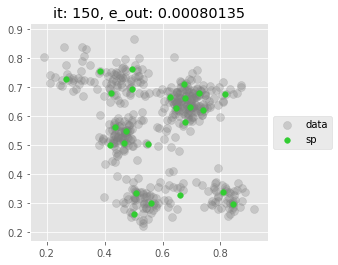

  [*] Overall it/s: 0.0318


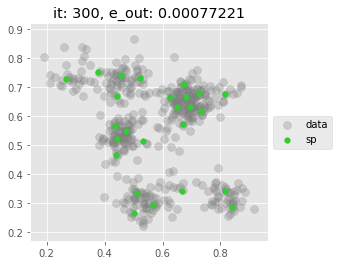

In [5]:
# Compute m support points on full set.
y_opt, e_opt = get_support_points(x, N, MAX_ITER, LR,
                                  is_tf=IS_TF, clip=True)

___

# 4. Sample many sets of support points with WLB

is_tf: True, y_init: radial, clip: bounds, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0312


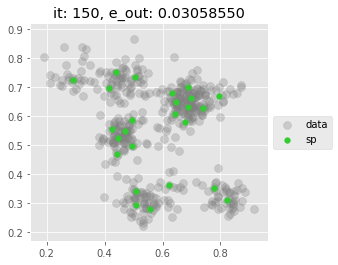

  [*] Overall it/s: 0.0331


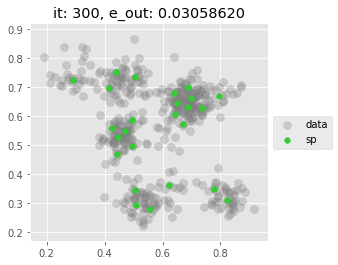

is_tf: True, y_init: radial, clip: bounds, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0375


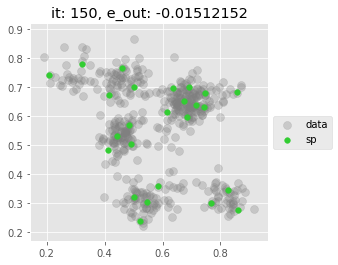

  [*] Overall it/s: 0.0296


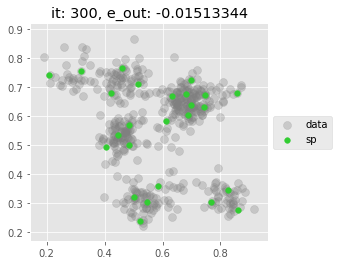

In [6]:
# Compute N support points from full set x.
num_samples = 2
y_opt_all = np.zeros((num_samples, N, DIM))

for i in range(num_samples):
    y_opt, e_opt = get_support_points(x, N, MAX_ITER, LR, is_tf=IS_TF,
                                      do_weights=True)
    y_opt_all[i] = y_opt

y_all = np.concatenate(y_opt_all, axis=0)

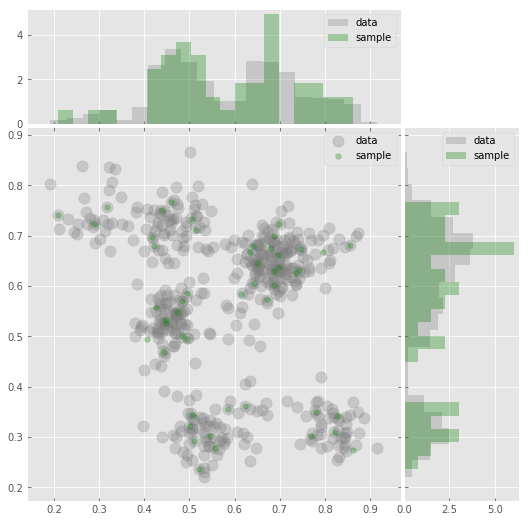

In [7]:
scatter_and_hist(x, y_all)

___

# 5. Uncertainty quantification.

$N(0, 1), Exp(1), Beta(2, 4)$

In [8]:
norm01_fn = lambda M: np.random.normal(loc=0, scale=1, size=(M, DIM))
exp1_fn = lambda M: np.random.exponential(scale=1, size=(M, DIM))
beta24_fn = lambda M: np.random.beta(a=2, b=4, size=(M, DIM))

M = 500
N = 25
LR = 5e-3
MAX_ITER = 1001
num_draws = 10

In [9]:
#print('Making samples of size {}'.format(N * num_draws))
#eval_uncertainty(norm01_fn, M, N, DIM, 0.01, 301, IS_TF, num_draws, plot=True)

In [ ]:
#print('Making samples of size {}'.format(N * num_draws))
#eval_uncertainty(beta24_fn, M, N, DIM, 0.01, 301, IS_TF, num_draws, plot=True)

Making samples of size 250
is_tf: True, y_init: random, clip: data, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0320


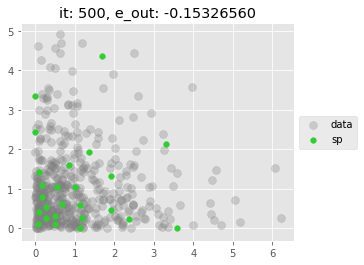

  [*] Overall it/s: 0.0280


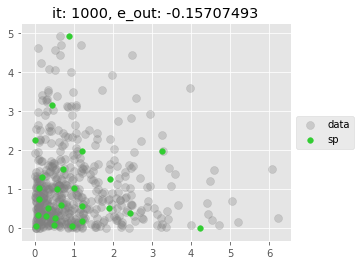

is_tf: True, y_init: random, clip: data, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0264


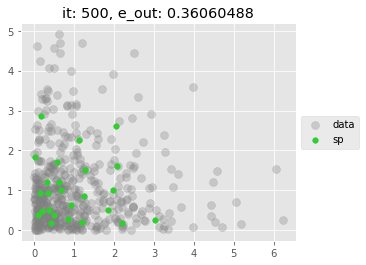

  [*] Overall it/s: 0.0274


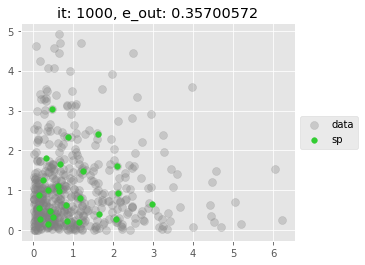

is_tf: True, y_init: random, clip: data, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0205


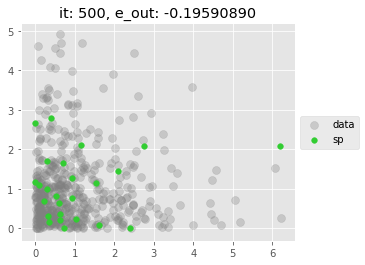

  [*] Overall it/s: 0.0203


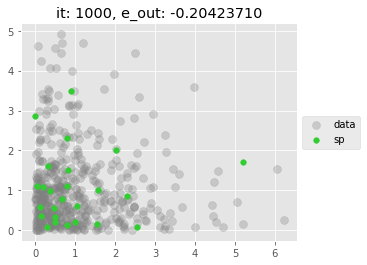

is_tf: True, y_init: random, clip: data, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0204


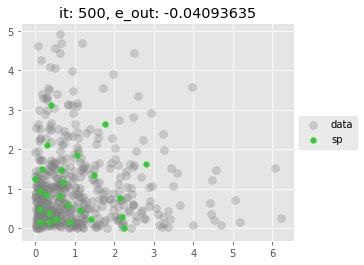

  [*] Overall it/s: 0.0201


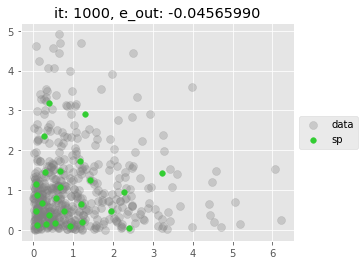

is_tf: True, y_init: random, clip: data, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0203


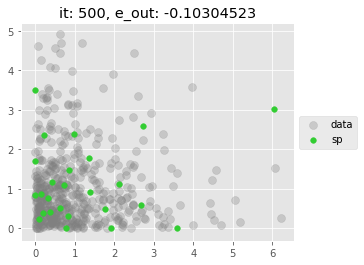

  [*] Overall it/s: 0.0203


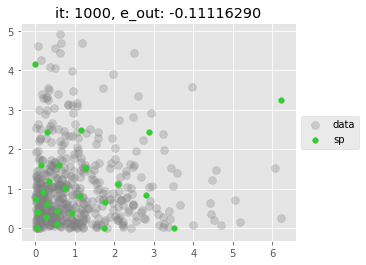

is_tf: True, y_init: random, clip: data, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0204


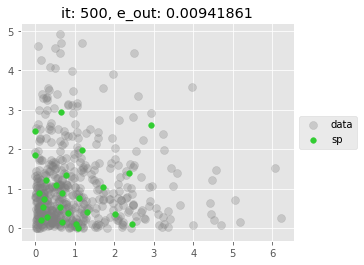

  [*] Overall it/s: 0.0201


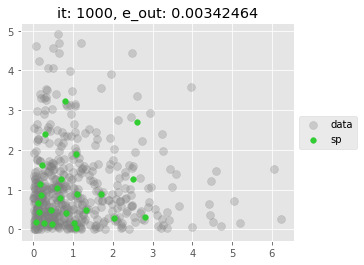

is_tf: True, y_init: random, clip: data, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0202


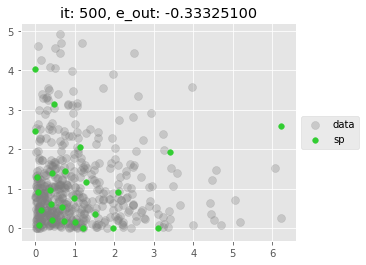

  [*] Overall it/s: 0.0213


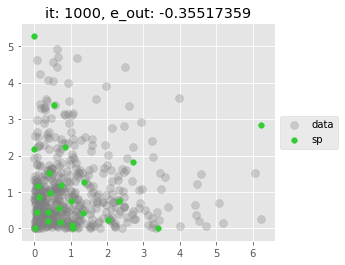

is_tf: True, y_init: random, clip: data, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0222


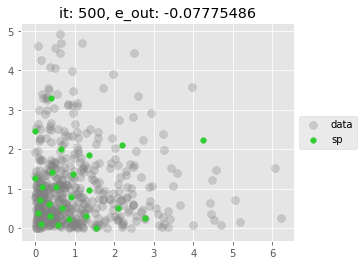

  [*] Overall it/s: 0.0219


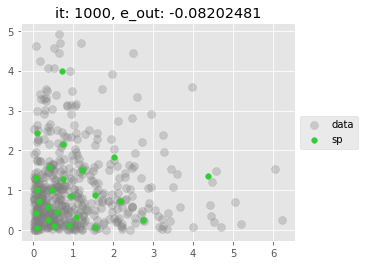

is_tf: True, y_init: random, clip: data, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0207


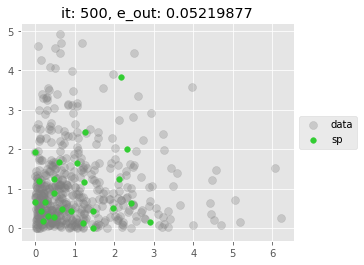

  [*] Overall it/s: 0.0204


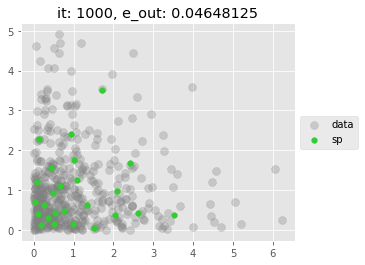

is_tf: True, y_init: random, clip: data, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0203


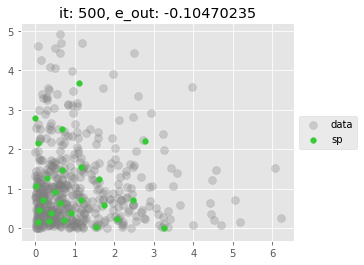

  [*] Overall it/s: 0.0201


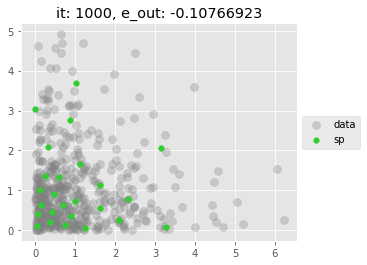

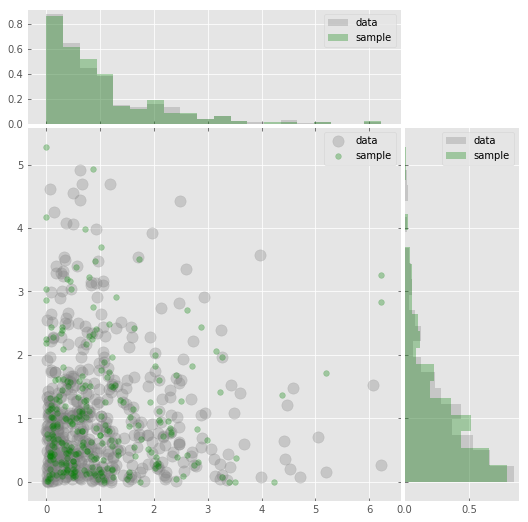

mean(x) = [1.01230236 1.03236492], mean(y) = [1.0029515  1.03904168]
cov(x) =
[[ 1.05680752 -0.03002987]
 [-0.03002987  0.94900783]]
cov(y_all) =
[[1.06508461 0.04942224]
 [0.04942224 0.90888658]]


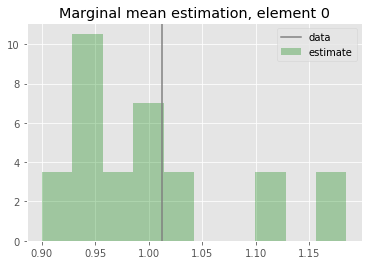

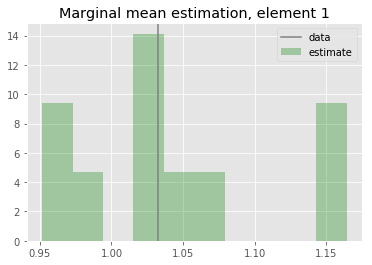

In [12]:
print('Making samples of size {}'.format(N * num_draws))
eval_uncertainty(exp1_fn, M, N, DIM, 0.01, 1001, IS_TF, num_draws, plot=True)